In [1]:
from sklearn.datasets import load_digits
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree, ensemble, learning_curve
import numpy as np
import pandas as pd

c:\users\higer\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\higer\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
X, y = load_digits(return_X_y=True)

Разделим выборку на обучающую и тестовую в соотношении 70 на 30

In [4]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, 
                                                                                     y, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

Создадим дерево с дефолтными аргументами

In [5]:
clf_tree = tree.DecisionTreeClassifier()

Измерим качество работы

In [6]:
score_cv_tree = cross_validation.cross_val_score(clf_tree, X, y, cv=10)
print('Cross val score:', score_cv_tree)
print('Mean:', score_cv_tree.mean())

Cross val score: [0.8        0.84153005 0.83425414 0.81111111 0.79888268 0.88826816
 0.89944134 0.83146067 0.82485876 0.81818182]
Mean: 0.8347988737574547


Обучим бэггинг и измерим качество

In [7]:
clf_bagging = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=100)

In [8]:
score_cv_bagging = cross_validation.cross_val_score(clf_bagging, X, y, cv=10)
print('Cross val score:', score_cv_bagging)
print('Mean:', score_cv_bagging.mean())

Cross val score: [0.88108108 0.96721311 0.90607735 0.95555556 0.91620112 0.97765363
 0.95530726 0.91011236 0.87570621 0.92045455]
Mean: 0.926536223032459


In [9]:
n_features=len(X[0])
clf_bagging_2 = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), 
                                           max_features=int(sqrt(n_features)),
                                           n_estimators=100)

In [10]:
score_cv_bagging_2 = cross_validation.cross_val_score(clf_bagging_2, X, y, cv=10)
print('Cross val score:', score_cv_bagging_2)
print('Mean:', score_cv_bagging_2.mean())

Cross val score: [0.88108108 0.9726776  0.9558011  0.93888889 0.92178771 0.94413408
 0.96648045 0.97752809 0.89830508 0.92613636]
Mean: 0.93828204434774


In [11]:
clf_bagging_3 = ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(random_state=np.random.RandomState), 
                                           max_features=int(sqrt(n_features)),
                                           n_estimators=100)

In [12]:
score_cv_bagging_3 = cross_validation.cross_val_score(clf_bagging_3, X, y, cv=10)
print('Cross val score:', score_cv_bagging_3)
print('Mean:', score_cv_bagging_3.mean())

Cross val score: [0.89189189 0.95628415 0.92265193 0.91666667 0.93854749 0.94413408
 0.94413408 0.98876404 0.87570621 0.90909091]
Mean: 0.9287871456447775


Посмотрим на RandomForestClassifier

In [13]:
clf_randforest = ensemble.RandomForestClassifier(n_estimators=100)

In [14]:
score_cv_randforest = cross_validation.cross_val_score(clf_randforest, X, y, cv=10)
print('Cross val score:', score_cv_randforest)
print('Mean:', score_cv_randforest.mean())

Cross val score: [0.92432432 0.96721311 0.95027624 0.96666667 0.95530726 0.97206704
 0.97765363 0.95505618 0.92655367 0.94886364]
Mean: 0.9543981770255208


Построим кривую обучения рандомного леса

In [15]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(clf_randforest, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=10, scoring='accuracy')

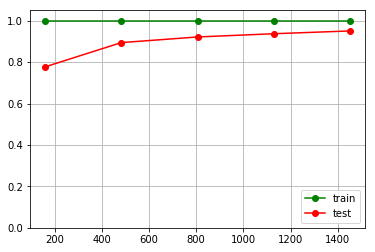

In [16]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')